In [1]:
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os

def get_current_dir():
    return os.getcwd().split("/")[-1]

def in_project_root_directory():
    return get_current_dir() == "ai-coursework-group6"

if not in_project_root_directory():
    os.chdir('..')
import virl
from helper_methods import plot as rand_deter_plot
from helper_methods import run
from plot_helper import plot as eval_plot
from matplotlib import pyplot as plt
import pickle
import itertools

class EvalData():
    
    NUM_OF_PROBLEM_IDS = 10
    
    def __init__(self, agent_name, stochastic, noisy):
        self.agent_name = agent_name
        self.rewards = {}
        self.stochastic = stochastic
        self.noisy = noisy
        
    def add_rewards(self, problem_id, rewards):
        self.rewards[problem_id] = rewards
        
    def create_plot(self):
        fig, axes = plt.subplots(5, 2, constrained_layout=True, figsize=(10,10),
                                 subplot_kw={'ylim':(-2.5, 0), 'xlabel':'Episode', 'ylabel':'Reward', 'yticks':np.arange(-2.5, 0, 0.5)})
        fig.suptitle("Stochastic = " + str(self.stochastic) + ", Noisy = " + str(self.noisy))
        
        num_episodes = len(self.rewards[0])
        for x,y in list(itertools.product(range(0, 5), range(0, 2))):
            axes[x, y].plot(np.arange(1, num_episodes + 1), self.rewards[(2*x) + y])
            axes[x, y].set_title(self.get_title((2*x) + y))
        
        filename = self.get_filename(fig=True)
        plt.savefig(filename)
        print("Saved figure at " + filename)
        
    def create_table(self):
        fig = plt.figure(dpi=80)
        ax = fig.add_subplot(1,1,1)
        ax.set_title("")

        rows = []
        for k, v in eval_data.rewards.items():
            rows.append([k, np.mean(np.array(v)), np.std(np.array(v))])

        all_total_rewards = np.array([row[1] for row in rows])
    
        max_reward = np.max(all_total_rewards)
        min_reward = np.min(all_total_rewards)

        GREEN = "#90ee90"
        RED = "#FF7F7F"

        cellColours = []
        for row in rows:
            reward = row[1]
            if reward == max_reward:
                cellColours.append([GREEN, GREEN, GREEN])
                continue
            if reward == min_reward:
                cellColours.append([RED, RED, RED])
                continue
            cellColours.append(["w","w","w"])
            
        rows = [[row[0], round(row[1], 2), round(row[2], 2)] for row in rows]
        column2title = "Average Reward" if self.stochastic or self.noisy else "Reward"
        table = ax.table(cellText=rows, colLabels=["Problem Id", column2title, "Std. Dev."], cellLoc="center", loc='center', cellColours=cellColours)
        table.set_fontsize(11)
        table.scale(1,1.6)
        ax.axis('off')
        
        filename = self.get_filename(fig=False)
        plt.savefig(filename)
        print("Saved table at " + filename)
          
            
    def get_title(self, problem_id):
        return self.agent_name + " problem id " + str(problem_id)
    
    def get_filename(self, fig):
        filename = "eval_output" + os.path.sep + self.agent_name
        if self.stochastic:
            filename += " Stochastic"
        if self.noisy:
            filename += " Noisy"
        if fig:
            filename += " Figure.png"
        else:
            filename += " Table.png"
        return filename

    def print_average_reward(self):
        for k,v in self.rewards.items():
            problem_id = str(k)
            reward = np.mean(np.array(v))
            print("ID: " + problem_id + " Reward: " + str(reward))
        
        
def plot(all_rewards, title):
    plt.title("Evaluate: " + title)
    plt.xlabel("Epsiode")
    plt.ylabel("Total Reward")
    plt.plot(all_rewards)


In [2]:
#evaluate the stochastic and noisy parameters
stochastic_noisy = {0:virl.Epidemic(stochastic=False, noisy=False),1:virl.Epidemic(stochastic=True, noisy=False),2:virl.Epidemic(stochastic=False, noisy=True),3:virl.Epidemic(stochastic=True, noisy=True)}
stochastic_noisy_print = {0:"stochastic=False, noisy=False",1:"stochastic=True, noisy=False",2:"stochastic=False, noisy=True",3:"stochastic=True, noisy=True"}


In [3]:
def mean_std(all_total_rewards,all_rewards,title):
    #mean and standard deviation
    total_reward_sd = np.std(all_total_rewards)
    total_reward_mean = np.mean(all_total_rewards)
    reward_sd = np.std(all_rewards)
    reward_mean = np.mean(all_rewards)

    print("---")
    print(title)
    print("Total reward standard deviation = " + str(total_reward_sd))
    print("Total reward mean = " + str(total_reward_mean))
    print("Reward standard deviation = " + str(reward_sd))
    print("Total reward mean = " + str(reward_mean))

## Deterministic

In [ ]:
from DeterministicAgent import DeterministicAgent

actions = ["no intervention", "impose a full lockdown", "implement track & trace", "enforce social distancing and face masks"]
stochastic = [False, True]
noisy = [False, True]


for i in range(len(stochastic)):
    for j in range(len(noisy)):
        for action, action_text in enumerate(actions):
            env = virl.Epidemic(stochastic=stochastic[i], noisy=noisy[j])
            agent = DeterministicAgent(env, action, action_text)
            states, rewards = run(agent)
            title = ", Stochastic = " + str(stochastic[i]) + ", " "Noisy = " + str(noisy[j])
            rand_deter_plot(agent, states, rewards, title)

for i in range(0,10):
    for action, action_text in enumerate(actions):
        env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
        agent = DeterministicAgent(env, action, action_text)
        states, rewards = run(agent)
        title = ", Problem id=" + str(i)
        rand_deter_plot(agent, states, rewards, title)

## Random

In [ ]:
from RandomAgent import RandomAgent

actions = ["no intervention", "impose a full lockdown", "implement track & trace", "enforce social distancing and face masks"]
stochastic = [False, True]
noisy = [False, True]

for i in range(len(stochastic)):
    for j in range(len(noisy)):
        env = virl.Epidemic(stochastic=stochastic[i], noisy=noisy[j])
        agent = RandomAgent(env, actions)
        states, rewards = run(agent)
        rand_deter_plot(agent, states, rewards)
        
for i in range(0,10):
    env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
    agent = RandomAgent(env, actions)
    states, rewards = run(agent)
    title = ", Problem id=" + str(i)
    rand_deter_plot(agent, states, rewards, title)

## Linear Policy

In [ ]:
from LinearAprxAgent import LinearAprxAgent

%cd
%cd ai-coursework-group6\notebooks\linear_aprx_output
%pwd

for i in range(0,10):
    title = "Linear Policy Evaluate: problem id " + str(i) + " "

    #load from disk
    intercept = np.genfromtxt("interceptP" + str(i) + ".csv", delimiter=',')
    coeff = np.genfromtxt("coeffP" + str(i) + ".csv", delimiter=',')
    state_transformed = np.genfromtxt("state_transformedP" + str(i) + ".csv", delimiter=',')
    q_values = np.genfromtxt("q_valueP" + str(i) + ".csv", delimiter=',')
    last_reward = np.genfromtxt("lastRewardP" + str(i) + ".csv", delimiter=',')
    
    env = virl.Epidemic(stochastic=False, noisy=False)
    agent = LinearAprxAgent(env)
    
    states,all_rewards, all_total_rewards = agent.evaluate(intercept,coeff,state_transformed[1:,:],q_values,last_reward)
    
    #plot data
    eval_plot(states,agent, all_total_rewards, all_rewards,title)
    mean_std(all_total_rewards,all_rewards,title)

In [ ]:
%cd
%cd ai-coursework-group6\notebooks\linear_aprx_output
%pwd

for i in range(0,4):
    print(stochastic_noisy_print[i])
    title = "Linear Policy Evaluate:" + stochastic_noisy_print[i]
    
    #load from disk
    intercept = np.genfromtxt("interceptP" + str(i) + ".csv", delimiter=',')
    coeff = np.genfromtxt("coeffP" + str(i) + ".csv", delimiter=',')
    state_transformed = np.genfromtxt("state_transformedP" + str(i) + ".csv", delimiter=',')
    q_value = np.genfromtxt("q_valueP" + str(i) + ".csv", delimiter=',')
    last_reward = np.genfromtxt("lastRewardP" + str(i) + ".csv", delimiter=',')
    
    env = stochastic_noisy[i]
    agent = LinearAprxAgent(env)
    
    states,all_rewards, all_total_rewards = agent.evaluate(intercept,coeff,state_transformed[1:,:],q_values,last_reward)
    
    #plot data
    eval_plot(states,agent, all_total_rewards, all_rewards,title)
    mean_std(all_total_rewards,all_rewards,title)

## Tabular Policy

In [ ]:
from Tabular_Policy_Agent import Tabular_Policy_Agent

%cd
%cd ai-coursework-group6\notebooks\Tabular_Policy_Output
%pwd

eval_data = EvalData("Tabular Policy", stochastic=False, noisy=False)

for i in range(0,10):
    title = "Tabular Policy Evaluate: problem id " + str(i) + " "
    
    #load from disk
    with open('TabularPolicyP' + str(i) + '.pkl', 'rb') as inpt:
        agent = pickle.load(inpt)
        states,all_rewards, all_total_rewards = agent.evaluate()
        
        #plot data
        eval_plot(states,agent, all_total_rewards, all_rewards,title)
        mean_std(all_total_rewards,all_rewards,title)
        eval_data.add_rewards(i, all_total_rewards)



eval_data.plot()

eval_data.print_average_reward()
        

In [ ]:
%cd
%cd ai-coursework-group6\notebooks\Tabular_Policy_Output
%pwd


eval_data = EvalData("Tabular Policy Stochastic", stochastic=False, noisy=False)

for i in range(0,4):
    print(stochastic_noisy_print[i])
    title = "Tabular Policy  Evaluate:" + stochastic_noisy_print[i]
    
    #load from disk
    with open('TabularPolicyS' + str(i) + '.pkl', 'rb') as inpt:
        agent = pickle.load(inpt)
    states,all_rewards, all_total_rewards = agent.evaluate()
    
    #plot data
    eval_plot(states,agent, all_total_rewards, all_rewards,title)
    mean_std(all_total_rewards,all_rewards,title)
    eval_data.add_rewards(i, all_total_rewards)

eval_data.plot()

eval_data.print_average_reward()
    
%cd

## Q learning

In [4]:
from q_learning_tabular.q_table import QTable
from q_learning_tabular.q_learning_agent import QLearningAgent

In [5]:
def evaluate_q_learning_tabular(eval_data, agent_trained_under_problem_id):
    for i in range(0,10):
        filename = "trained_agents/q_learning_tabular_problem_id_" + str(agent_trained_under_problem_id) + ".txt"
        internal_loaded_q_table = QTable.load_raw_q_table_from_file(filename)
        env = virl.Epidemic(stochastic=eval_data.stochastic, noisy=eval_data.noisy, problem_id=i)
        agent = QLearningAgent(env, print_out_every_x_episodes=1, internal_q_table=internal_loaded_q_table)
        all_total_rewards = agent.evaluate(25)
        eval_data.add_rewards(i, all_total_rewards)
    return eval_data

Saved figure at eval_output\Q Learning Tabular Figure.png
Saved table at eval_output\Q Learning Tabular Table.png


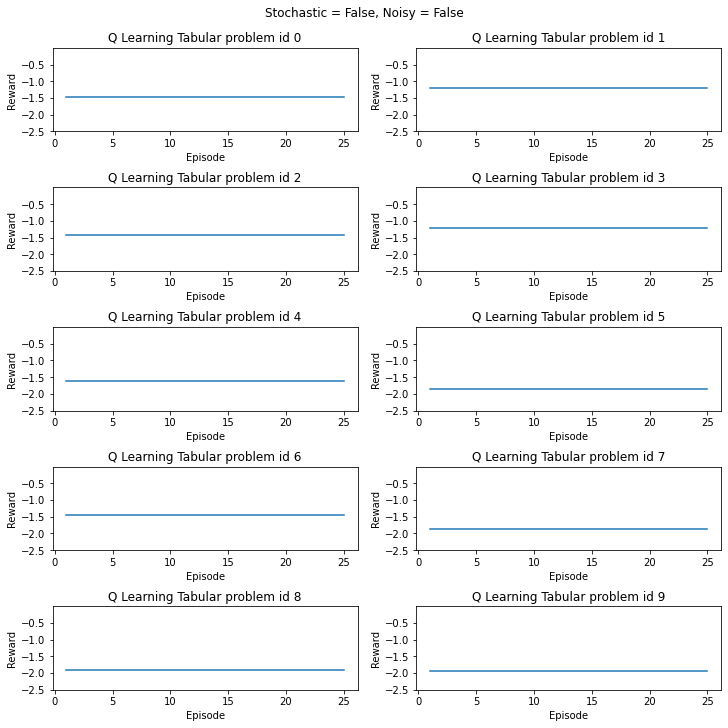

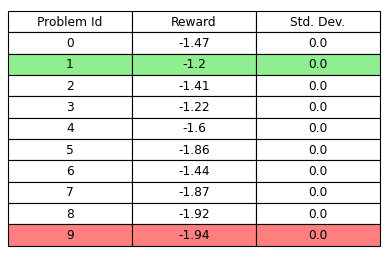

In [6]:
eval_data = EvalData("Q Learning Tabular", stochastic=False, noisy=False)
evaluate_q_learning_tabular(eval_data, 0)
eval_data.create_plot()
eval_data.create_table()

Saved figure at eval_output\Q Learning Tabular Stochastic Figure.png
Saved table at eval_output\Q Learning Tabular Stochastic Table.png


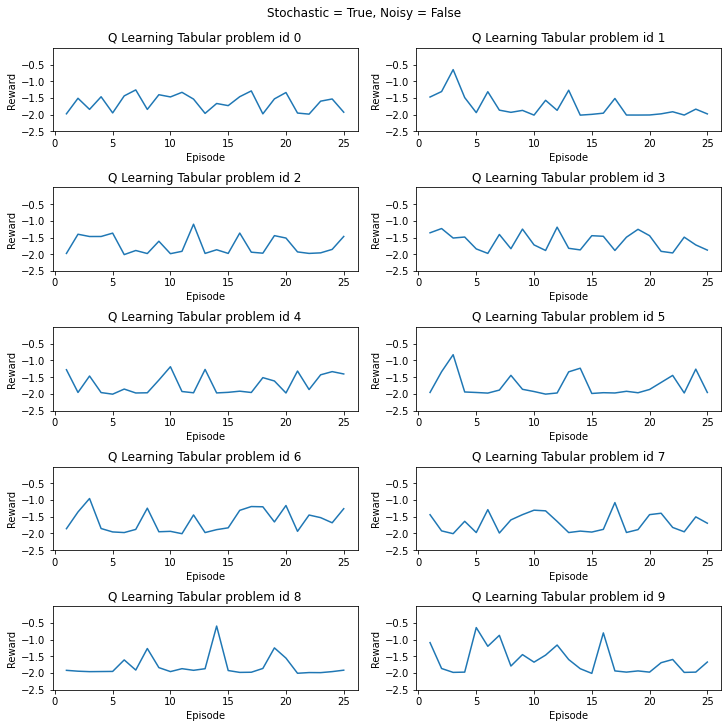

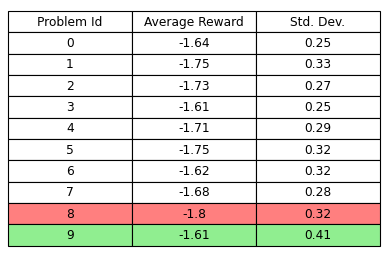

In [7]:
eval_data = EvalData("Q Learning Tabular", stochastic=True, noisy=False)
evaluate_q_learning_tabular(eval_data, 0)
eval_data.create_plot()
eval_data.create_table()

Saved figure at eval_output\Q Learning Tabular Noisy Figure.png
Saved table at eval_output\Q Learning Tabular Noisy Table.png


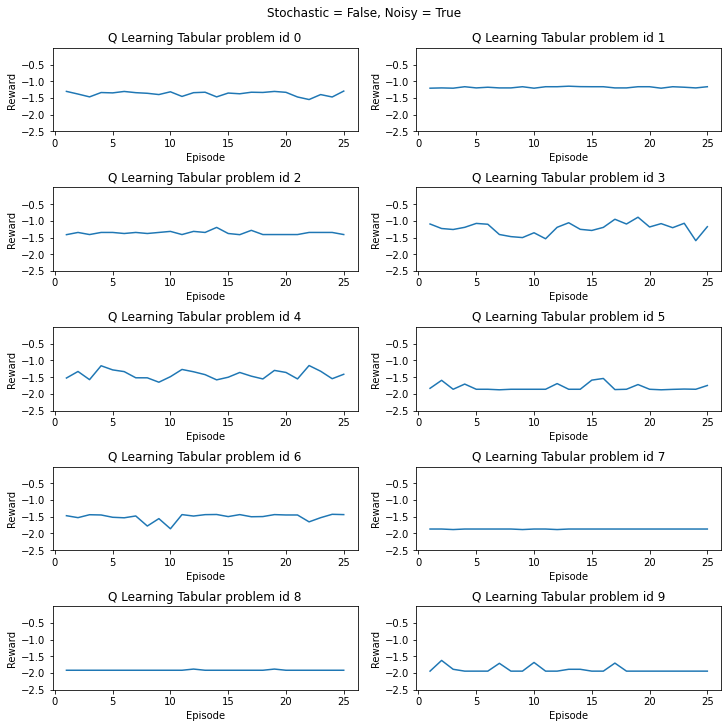

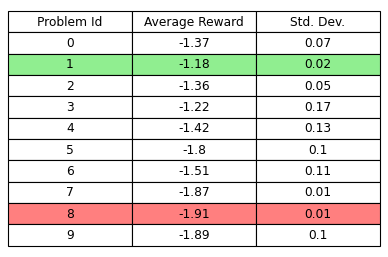

In [8]:
eval_data = EvalData("Q Learning Tabular", stochastic=False, noisy=True)
evaluate_q_learning_tabular(eval_data, 0)
eval_data.create_plot()
eval_data.create_table()

## Q learning Neural Network

In [9]:
from q_learning_nn.nn_function_approximator import NNFunctionApproximatorJointKeras, init_networks, load_trained_network
from q_learning_nn.memory import ReplayMemory, Transition
from q_learning_nn.agent import Agent
from q_learning_nn.strategy import Strategy
from q_learning_nn.run import qlearning_nn

In [10]:
def evaluate_q_learning_nn(eval_data, agent_trained_under_problem_id):
    for i in range(0,10):
        filename = "policy_network_problem_id_" + str(agent_trained_under_problem_id) + ".h5"
        policy_network_new, target_network_new = load_trained_network(filename, virl)
        agent = Agent(virl.Epidemic(stochastic=eval_data.stochastic, noisy=eval_data.noisy, problem_id=i), learning_rate=0.0)
        rewards = qlearning_nn(agent=agent, policy_network=policy_network_new, target_network=target_network_new, num_episodes=25)
        eval_data.add_rewards(i, rewards)
    return eval_data

Saved figure at eval_output\Q Learning Neural Network Figure.png
Saved table at eval_output\Q Learning Neural Network Table.png


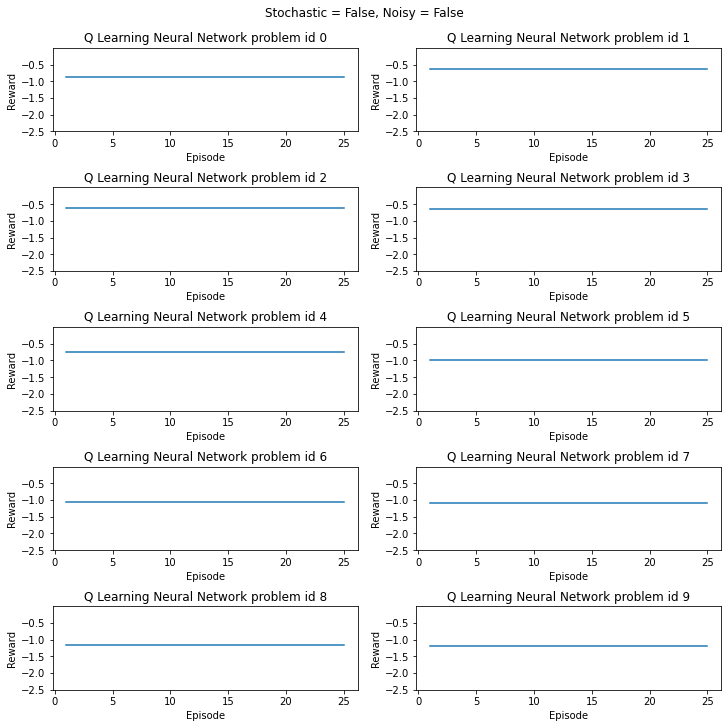

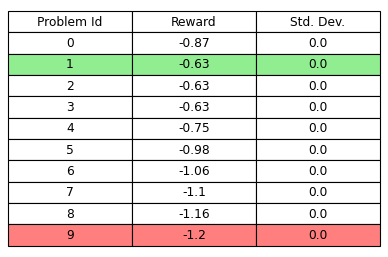

In [11]:
eval_data = EvalData("Q Learning Neural Network", stochastic=False, noisy=False)
evaluate_q_learning_nn(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()

Saved figure at eval_output\Q Learning Neural Network Stochastic Figure.png
Saved table at eval_output\Q Learning Neural Network Stochastic Table.png


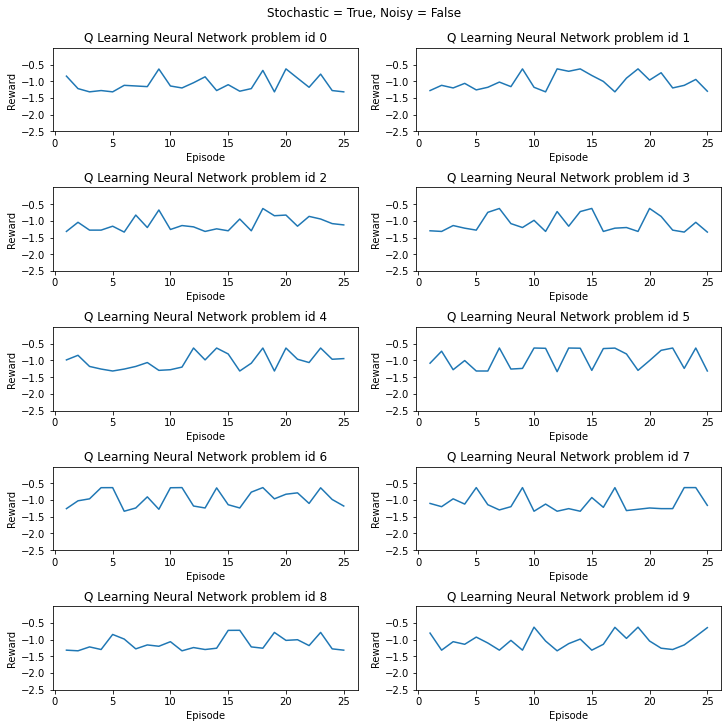

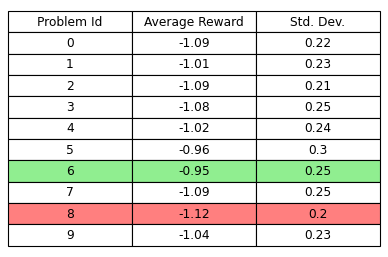

In [12]:
eval_data = EvalData("Q Learning Neural Network", stochastic=True, noisy=False)
evaluate_q_learning_nn(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()

Saved figure at eval_output\Q Learning Neural Network Noisy Figure.png
Saved table at eval_output\Q Learning Neural Network Noisy Table.png


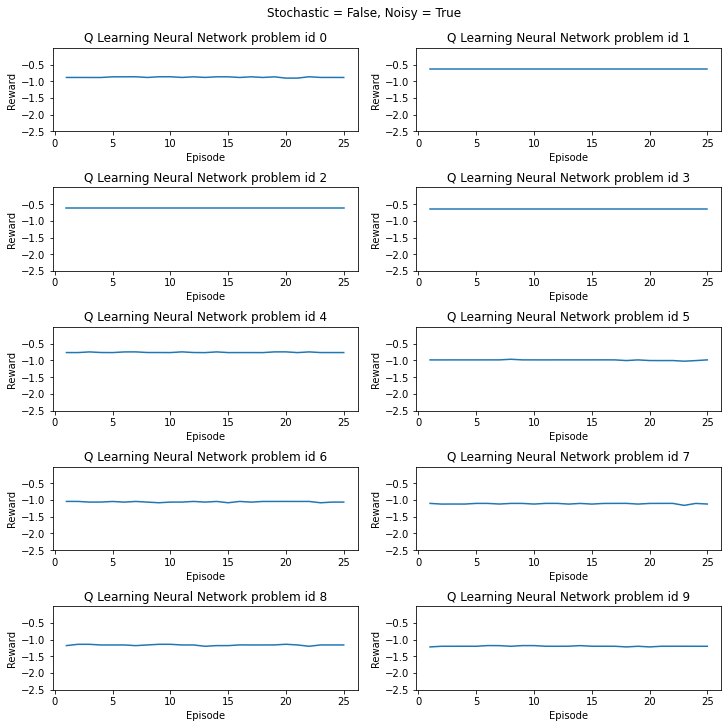

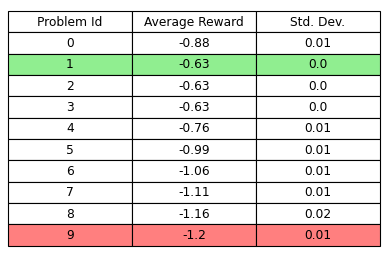

In [13]:
eval_data = EvalData("Q Learning Neural Network", stochastic=False, noisy=True)
evaluate_q_learning_nn(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()